In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from mpl_settings_v3 import *

from metodos import euler, Qtest, QtildeTest

Resolver

$$
\begin{align}
y(t) &= \lambda y + \sin(2\pi t) \\
y(0) &= 1
\end{align}
$$

Solución analítica:

$$
y(t) = \dfrac{\lambda}{\lambda^2+4\pi^2} \sin(2\pi t) + \left[e^{\lambda t} - \cos(2\pi t) \right] \dfrac{2\pi}{\lambda^2+4\pi^2}
$$

In [5]:
def f(y, t):
    return -y + np.sin(2*np.pi*t)

def y_theo(t, l=-1):
    a = (l**2+4*np.pi**2)
    return -(l/a)*np.sin(2*np.pi*t) + (np.exp(l*t) - np.cos(2*np.pi*t)) * (2*np.pi/a) + np.exp(l*t)

l = -1
y0 = 1
t0 = 0
T = 2
time = np.linspace(t0, T, 1000)
k_values = [0.1, 0.01, 0.001]
y_euler_sol = {}
euler_times = {}
for k in k_values:

    y_euler = euler(f, k, t0, T, y0)
    y_euler_sol[k] = y_euler
    euler_time = np.linspace(t0, T, len(y_euler))
    euler_times[k] = euler_time

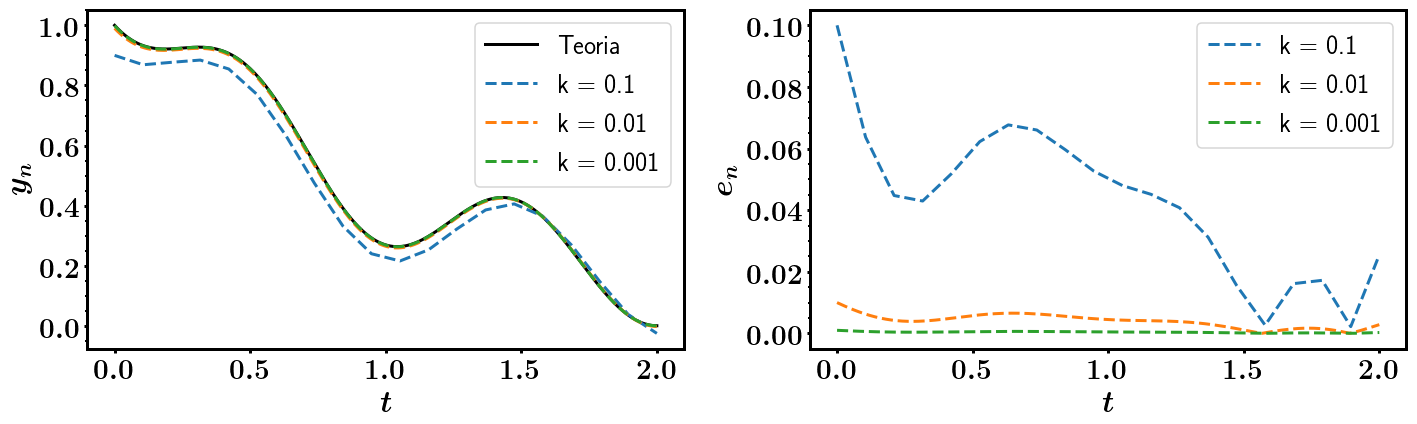

In [6]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols,6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y_n$')
ax.plot(time, y_theo(time, l), color='k', label='Teoria')
for k in k_values:
    ax.plot(euler_times[k], y_euler_sol[k], '--', label='k = {}'.format(k))
ax.legend()

ax = axes[1]
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$e_n$')
for k in k_values:
    time = euler_times[k]
    err = np.fabs(y_theo(time, l) - y_euler_sol[k])
    ax.plot(euler_times[k], err, '--', label='k = {}'.format(k))
ax.legend()

plt.tight_layout()
plt.show()

$$
\begin{align}
\dfrac{dy}{dt} &= y + t^2 \\
y(0) &= 1
\end{align}
$$

Solución

$$
y(t) = 3 e^t - 2t -t^2 - 2
$$

In [8]:
def y_theo(t):
    return 3*np.exp(t) - 2*t - t**2 - 2

def f(y, t):
    return y + t**2

y0 = 1
t0 = 0
T = 2
params = [l]

k_values = [0.05, 0.005, 0.001]
y_euler_sol = {}
euler_times = {}
for k in k_values:

    y_euler = euler(f, k, t0, T, y0)
    y_euler_sol[k] = y_euler
    euler_time = np.linspace(t0, T, len(y_euler))
    euler_times[k] = euler_time

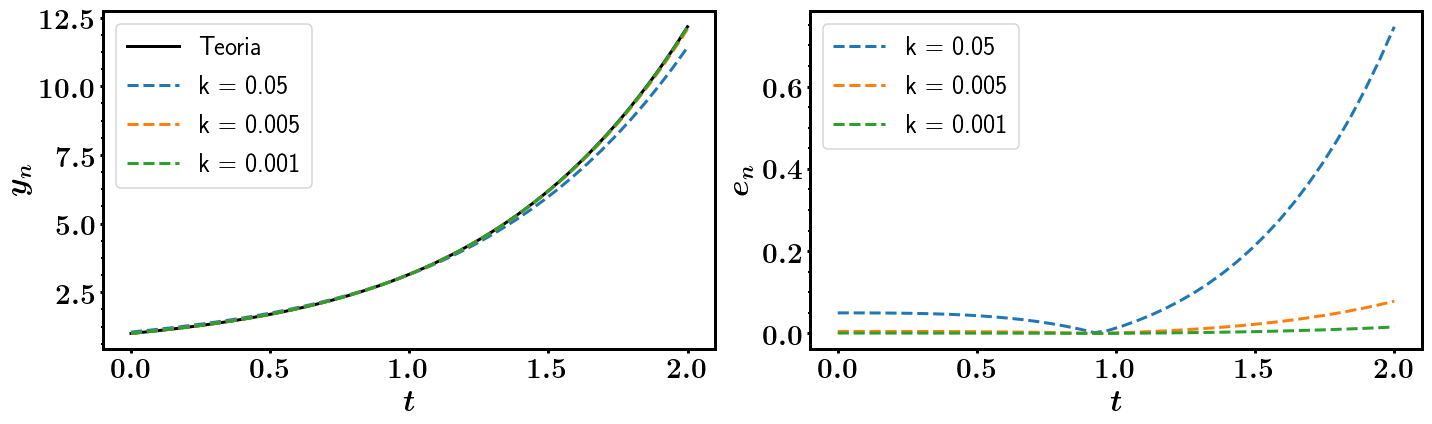

In [9]:
ncols = 2
nrows = 1
fig, axes = plt.subplots(figsize=(10*ncols,6*nrows), ncols=ncols, nrows=nrows)

ax = axes[0]
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y_n$')
ax.plot(time, y_theo(time), color='k', label='Teoria')
for k in k_values:
    ax.plot(euler_times[k], y_euler_sol[k], '--', label='k = {}'.format(k))
ax.legend()

ax = axes[1]
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$e_n$')
for k in k_values:
    time = euler_times[k]
    err = np.fabs(y_theo(time) - y_euler_sol[k])
    ax.plot(euler_times[k], err, '--', label='k = {}'.format(k))
ax.legend()

plt.tight_layout()
plt.show()

In [12]:
kmin = 0.001
kmax = 0.1
dk = 0.001
max_e_values = []
k_values = np.arange(kmin, kmax, dk)
for k in k_values:

    y_euler = euler(f, k, t0, T, y0)
    euler_time = np.linspace(t0, T, len(y_euler))
    err = np.fabs(y_theo(euler_time) - y_euler)
    max_e_values.append(np.max(err))
    
max_e_values = np.array(max_e_values)

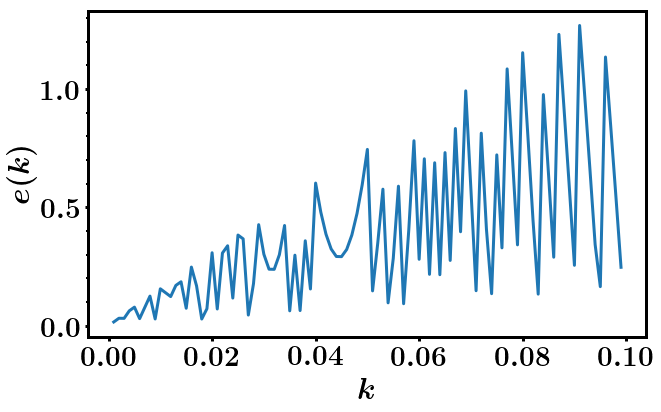

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$e(k)$')
ax.plot(k_values, max_e_values, '-')

a = 15
Y = a*k_values
#ax.plot(k_values, Y, color='k', linestyle='--')
plt.show()

Test

$$
Q(t) = \dfrac{v^{(1)}(t,k) - y(t)}{v^{(2)}(t,k/2) - y(t)} \simeq 2
$$

Help on function euler in module metodos:

euler(f, k, a, b, y0)
    Solve the problem
    
        dy/dt = f(y, t) 
        y(t=a) = y0
    
    in interval a <= t < b, with 
    step size k using the Euler method

None


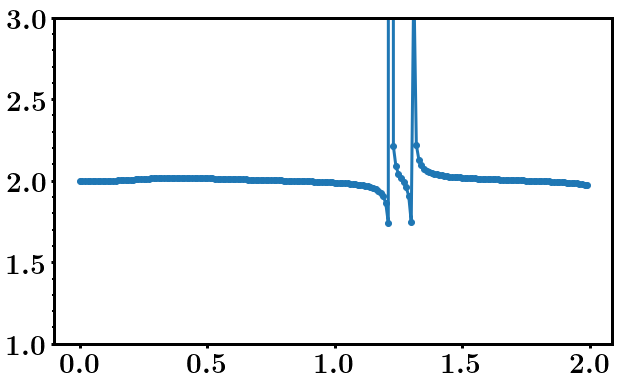

In [6]:
Qk = 0.01
Qtime, Q = QtildeTest(f, Qk, t0, T, y0, method='euler')   

fig, ax = plt.subplots(figsize=(10,6))

ax.set_ylim(1, 3)
ax.plot(Qtime, Q, '-o')

plt.show()